In [ ]:
%matplotlib inline

In [ ]:
import torch
import torch.nn as nn # Use torch.nn as nn
import torch.nn.functional as F # Use torch.nn.functional as F

class Net(nn.Module):
    # Network for Simple Image Processing
    # Spec
    # INPUT : 32 * 32 pixels 1 image
    # Layer 1 : 3 * 3 square kernel -> 28 * 28 pixels with 6 output channels (Convolution) / 14 * 14 pixels with 6 output channels(Subsampling)
    # Layer 2 : 3 * 3 square kernel -> 10 * 10 pixels with 16 output channels (Convolution) / 5 * 5 pixels with 16 output channels(Subsampling)
    # Layer 3 : 120 nodes
    # Layer 4 : 84 nodes
    # Layer 5(OUTPUT) : 10 nodes (labels for 1 to 10)
    def __init__(self):
        super(Net, self).__init__()
        # 2 Convolution Layers
        self.conv1 = nn.Conv2d(1, 6, 3) # 1 input image channel, 6 output channels, 3 x 3 square convolution
        self.conv2 = nn.Conv2d(6, 16, 3) # 6 input channels, 16 output channels, 3 * 3 square convolution
        # 2 Fulley Connected Layers
        self.fc1 = nn.Linear(16 * 6 * 6, 120)
        self.fc2 = nn.Linear(120, 84)
        # 1 Output Layer
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2)) # Conv -> ReLu -> Pooling(Max-Pooling)
        x = F.max_pool2d(F.relu(self.conv1(x)), 2) # 2 -> equals to (2, 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x) # no Activation
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

net = Net()
print(net)

In [ ]:
# implementation of NN with numpy
# 목표 : random한 input이 random한 output을 학습하는 과정
import numpy as np

# N is batch size; D_in is input dimension; H is hidden Dimension; D_out is output dimension
N, D_in, H, D_out = 64, 1000, 100, 10

# Create Random input and output data
x = np.random.randn(N, D_in) # randn : rand var with (avg0, std1) as [M, N] array
y = np.random.randn(N, D_out)

# Randomly initialize weights
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

learning_rate = 1e-6

for t in range(500):
    # Forward Prop
    h = x.dot(w1)
    h_relu = np.maximum(h, 0)
    y_pred = h_relu.dot(w2)
    
    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    print(t, loss)
    
    # Backprop
    grad_y_pred = 2.0 * (y_pred - y) # 2*(o-d) : Euclidean Distance의 도함수
    grad_w2 = h_relu.T.dot(grad_y_pred) # gradient descent
    grad_h_relu = grad_y_pred.dot(w2.T) # output layer -> hidden layer gradient 전파
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0 # ReLu를 사용하고 있으므로 h < 0인 값은 그 gradient도 0으로 초기화 (전파하지 않음)
    grad_w1 = x.T.dot(grad_h) # hidden layer -> input gradient 전파 / 보통 input은 layer로 치지 않는다.
    
    # Update weights
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

In [ ]:
import torch


dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random input and output data
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)

# Randomly initialize weights
w1 = torch.randn(D_in, H, device=device, dtype=dtype)
w2 = torch.randn(H, D_out, device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(500):
    # Forward pass: compute predicted y
    h = x.mm(w1) # numpy의 dot product와 같은 효과
    h_relu = h.clamp(min=0) # (x,0~x) 로 fitting
    y_pred = h_relu.mm(w2)

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99: # 이전과 달리 100번째마다 print
        print(t, loss)

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)

    # Update weights using gradient descent
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

In [ ]:
# -*- coding: utf-8 -*-
import torch

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold input and outputs.
# Setting requires_grad=False indicates that we do not need to compute gradients
# with respect to these Tensors during the backward pass.
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)

# Create random Tensors for weights.
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
w1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(500):
    # Forward pass: compute predicted y using operations on Tensors; these
    # are exactly the same operations we used to compute the forward pass using
    # Tensors, but we do not need to keep references to intermediate values since
    # we are not implementing the backward pass by hand.
    y_pred = x.mm(w1).clamp(min=0).mm(w2)

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call w1.grad and w2.grad will be Tensors holding the gradient
    # of the loss with respect to w1 and w2 respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    # An alternative way is to operate on weight.data and weight.grad.data.
    # Recall that tensor.data gives a tensor that shares the storage with
    # tensor, but doesn't track history.
    # You can also use torch.optim.SGD to achieve this.
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad

        # Manually zero the gradients after updating weights
        w1.grad.zero_()
        w2.grad.zero_()

In [ ]:
# RNN based on numpy by learning binary addition operation
# Import Libraries
import copy, numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
%matplotlib inline

In [ ]:
# Functions
def sigmoid(x):
    output = 1 / (1 + np.exp(-x))
    return output

def sigmoid_output_to_derivative(output):
    return output * (1 - output)

In [ ]:
# Decide the maximum dimension (8 bit)
max_binary_dim = 8
largest_number = pow(2, max_binary_dim)

In [ ]:
# Create binary lookup table
# np.unpackbits e.g.
print(np.unpackbits(np.array([8], dtype = np.uint8)))
print("====================")
# 1~256 Integer to nested list
# e.g
# binary_gonna_be = np.array([range(largest_number)], dtype=np.uint8).T
# print(binary_gonna_be)
binary = np.unpackbits(np.array([range(largest_number)], dtype=np.uint8).T, axis = 1)
#print(binary.shape, binary)
print("====================")
int2binary = {}
for i in range(largest_number):
    int2binary[i] = binary[i]
print("lookup table test")
#print(binary[3], int2binary[244])
#print(int2binary)

In [ ]:
alpha = 0.1 #learning rate
input_dim = 2
hidden_dim = 16
output_dim = 1

synapse_0 = 2*np.random.random((input_dim,hidden_dim))-1 # [-1,1) / (b-a) * random_sample() + a
synapse_1 = 2*np.random.random((hidden_dim,output_dim))-1
synapse_h = 2*np.random.random((hidden_dim,hidden_dim))-1

print(synapse_0.shape, synapse_1.shape, synapse_h.shape)

In [111]:
max_iter = 20000 # EPOCH
# saving for updates and visualization
s0_update = np.zeros(synapse_0.shape) # s0_update = np.zeros_like(synapse_0)
s1_update = np.zeros(synapse_1.shape) 
sh_update = np.zeros(synapse_h.shape) 

overallError_history = list()
accuracy = list()
accuracy_history = list()
accuracy_count = 0
for j in range(max_iter):
    # Randomly pick two integers and change it to the binary representation
    a_int = np.random.randint(1,largest_number//2) # '//' : quotient by 2
    a = int2binary[a_int]
    b_int = np.random.randint(1,largest_number//2)
    b = int2binary[b_int]
    # 실제 정답 계산 및 binary 벡터 저장.
    # Calculate the answer and save it as a binary form
    c_int = a_int + b_int
    c = int2binary[c_int]
    
    # RNN이 예측한 binary 합의 값 저장할 변수 선언.
    # Declare the variable for saving the prediction by RNN
    pred = np.zeros_like(c)
    
    overallError = 0
    
    output_layer_deltas = list()
    hidden_layer_values = list()
    hidden_layer_values.append(np.zeros(hidden_dim)) # dim: (1, 16)
    
    # feed forward !
    # 이진수의 가장 낮은 자리수부터 시작해야하므로 reversed로 for문 돌림.
    # As you have to calculate from the "first" position of the binary number, which stands for the lowest value, loop backward.
    # e.g. 
    # 10(2) + 11(2), for the first iteration: X = [[0,1]] y = [[1]]
    for position in reversed(range(max_binary_dim)):
        
        # RNN에 들어갈 input과 output label 이진수 값 가져오기
        # Take the input and output label binary values
        X = np.array([[a[position],b[position]]]) # dim: (1, 2), e.g. [[1,0]]
        y = np.array([[c[position]]]) # dim: (1, 1), e.g. [[1]]
        
        # hidden layer 계산하기 h_t = sigmoid(X*W_{hx} + h_{t-1}*W_{hh})
        hidden_layer = sigmoid(np.dot(X,synapse_0) + np.dot(hidden_layer_values[-1],synapse_h)) # dim: (1, 16)
        # hidden_layer_values[-1] : indexing the last element of hidden_layer_values
        
        # output_layer 계산하기       
        output_layer = sigmoid(np.dot(hidden_layer,synapse_1)) # dim: (1, 1), e.g. [[0.47174173]]
        
        # error 계산
        output_layer_error = y-output_layer # dim: (1, 1) 
        
        # display를 위한 저장 (just for displying error curve)
        overallError += np.abs(output_layer_error[0]) # dim: (1, )          
        
        # 이 후 backpropagation에서 사용될 delta 값 미리 계산하여 저장
        # Save it for the later use in backpropagation step        
        output_layer_deltas.append((output_layer_error) * sigmoid_output_to_derivative(output_layer))        
        
        # 현재 자리수에 대한 예측값 저장
        # save the prediction by my model on this position
        pred[position] = np.round(output_layer[0][0])
        
        # 현재까지 계산된 hidden layer 저장
        # save the hidden layer by appending the values to the list
        hidden_layer_values.append(copy.deepcopy(hidden_layer)) 
    
    if (j%100 == 0):
        overallError_history.append(overallError[0])
    
    # 이제 backpropagation !
        
    # 맨 처음 시작할 때는 현재 시점보다 앞에 있는 hidden layer가 없으므로 delta 값이 0임.  
    # As RNN needs to consider the "future" hidden layer value to calculate the backpropagation and it does not have the 
    # value at the first time (at the end of the position where backpropagation starts), we have to initialize it with zeros
    future_hidden_layer_delta = np.zeros(hidden_dim)
    
    # backpropagation을 할 때는 이진수의 가장 앞자리수 시점부터 돌아와야 하므로 정상적인 for문
    # Now it should go "backward" which means an ordinary way in the for loop
    for position in range(max_binary_dim):
        
        # 필요한 값들 다시 불러오고 
        # bring what you needs for calculation
        X = np.array([[a[position],b[position]]])
        hidden_layer = hidden_layer_values[-position-1]
        prev_hidden_layer = hidden_layer_values[-position-2]
        
        # 현재 시점에서 output layer error로부터 돌아오는 gradient 값
        # Get the gradients flowing back from the error of my output at this position, or time step
        output_layer_delta = output_layer_deltas[-position-1]
        
        # 현재 시점의 hidden layer에 더해진 gradient를 계산하기 위해서는
        # 이전 시점의 hidden layer로부터 돌아오는 error gradient + 현재 시점 output layer로부터 돌아오는 error gradient
        # 이 둘의 합에 sigmoid의 derivative 계산해줘야 함
        # 이유: h_t = sigmoid(X*W_{hx} + h_{t-1}*W_{hh})를 역전파 하는 것을 생각하면 됨.
        # Important part! (Backpropagation)
        # Think about the feed forward step you have done before: h_t = sigmoid(X*W_{hx} + h_{t-1}*W_{hh})
        hidden_layer_delta = (np.dot(future_hidden_layer_delta,synapse_h.T) + np.dot(output_layer_delta,synapse_1.T)) \
                            * sigmoid_output_to_derivative(hidden_layer)
        
        # 8자리 모두를 다 계산한 후 gradient의 합을 한 번에 update 해준다. 
        # 이유: backprop이 아직 다 끝나지 않았는데 중간에 hidden layer의 value가 바뀌면 안됨
        # Save the updates until the for loop finishes calculation for every position
        # Hidden layer values must be changed ONLY AFTER backpropagation is fully done at every position.
        s1_update += np.atleast_2d(hidden_layer).T.dot(output_layer_delta)
        sh_update += np.atleast_2d(prev_hidden_layer).T.dot(hidden_layer_delta)
        s0_update += X.T.dot(hidden_layer_delta)
        
        # 다음 position으로 넘어가면 현재 hidden_layer_delta가 future step이 되므로 이를 넣어준다.
        # Preparation for the next step. Now the current hidden_layer_delta becomes the future hidden_layer_delta.
        future_hidden_layer_delta = hidden_layer_delta

    # weight 값들 update (learning rate를 곱하여)
    synapse_1 += s1_update*alpha
    synapse_0 += s0_update*alpha
    synapse_h += sh_update*alpha
    
    # update value initialization for the new training data (새로운 a,b training 이진수에 대해 계산을 해줘야하므로)
    s1_update *= 0
    s0_update *= 0    
    sh_update *= 0
    
    # accuracy 계산
    check = np.equal(pred,c)
    if np.sum(check) == max_binary_dim:
        accuracy_count += 1
    if (j%100 == 0):
        accuracy_history.append(accuracy_count)
        accuracy_count = 0
    
    
    if (j % 100 == 0):
        print ("Error:" + str(overallError))
        print ("Pred:" + str(pred))  # 예측값
        print ("True:" + str(c))  # 실제값

        final_check = np.equal(pred,c)
        print (np.sum(final_check) == max_binary_dim)

        out = 0

        for index, x in enumerate(reversed(pred)):
            out += x * pow(2, index)
        print (str(a_int) + " + " + str(b_int) + " = " + str(out))
        print ("------------")

Error:[0.05461005]
Pred:[1 0 0 0 1 1 0 1]
True:[1 0 0 0 1 1 0 1]
True
32 + 109 = 141
------------
Error:[0.0339727]
Pred:[0 0 1 1 1 1 1 0]
True:[0 0 1 1 1 1 1 0]
True
33 + 29 = 62
------------
Error:[0.05299518]
Pred:[0 0 0 1 1 1 1 1]
True:[0 0 0 1 1 1 1 1]
True
30 + 1 = 31
------------
Error:[0.07249891]
Pred:[1 0 0 1 1 0 1 0]
True:[1 0 0 1 1 0 1 0]
True
55 + 99 = 154
------------
Error:[0.06553363]
Pred:[0 1 0 0 1 0 1 0]
True:[0 1 0 0 1 0 1 0]
True
16 + 58 = 74
------------
Error:[0.07827149]
Pred:[1 0 1 0 1 0 0 0]
True:[1 0 1 0 1 0 0 0]
True
73 + 95 = 168
------------
Error:[0.08466326]
Pred:[0 1 1 0 1 0 0 0]
True:[0 1 1 0 1 0 0 0]
True
58 + 46 = 104
------------
Error:[0.07566538]
Pred:[1 1 1 0 1 0 1 0]
True:[1 1 1 0 1 0 1 0]
True
127 + 107 = 234
------------
Error:[0.10545346]
Pred:[1 0 0 1 1 0 0 0]
True:[1 0 0 1 1 0 0 0]
True
122 + 30 = 152
------------
Error:[0.06838954]
Pred:[0 0 1 0 0 0 0 1]
True:[0 0 1 0 0 0 0 1]
True
15 + 18 = 33
------------
Error:[0.07745865]
Pred:[1 1 1 1

Error:[0.07524478]
Pred:[1 0 1 0 1 1 1 1]
True:[1 0 1 0 1 1 1 1]
True
54 + 121 = 175
------------
Error:[0.06113549]
Pred:[1 0 0 1 0 0 1 1]
True:[1 0 0 1 0 0 1 1]
True
98 + 49 = 147
------------
Error:[0.06891355]
Pred:[0 1 1 0 0 0 0 0]
True:[0 1 1 0 0 0 0 0]
True
1 + 95 = 96
------------
Error:[0.05577713]
Pred:[0 1 0 1 0 1 1 1]
True:[0 1 0 1 0 1 1 1]
True
50 + 37 = 87
------------
Error:[0.06524641]
Pred:[0 0 1 1 1 1 0 1]
True:[0 0 1 1 1 1 0 1]
True
19 + 42 = 61
------------
Error:[0.06793776]
Pred:[1 1 1 0 0 1 1 1]
True:[1 1 1 0 0 1 1 1]
True
118 + 113 = 231
------------
Error:[0.05317041]
Pred:[1 0 1 1 1 1 1 0]
True:[1 0 1 1 1 1 1 0]
True
76 + 114 = 190
------------
Error:[0.07187298]
Pred:[0 1 1 0 0 0 0 0]
True:[0 1 1 0 0 0 0 0]
True
84 + 12 = 96
------------
Error:[0.05195108]
Pred:[0 1 0 1 1 0 0 0]
True:[0 1 0 1 1 0 0 0]
True
65 + 23 = 88
------------
Error:[0.07583068]
Pred:[1 1 0 1 0 0 1 1]
True:[1 1 0 1 0 0 1 1]
True
87 + 124 = 211
------------
Error:[0.04229107]
Pred:[1 0 1 

Error:[0.05810305]
Pred:[1 0 0 0 1 1 0 0]
True:[1 0 0 0 1 1 0 0]
True
108 + 32 = 140
------------
Error:[0.0673381]
Pred:[1 0 1 1 0 0 1 1]
True:[1 0 1 1 0 0 1 1]
True
105 + 74 = 179
------------
Error:[0.08556014]
Pred:[1 0 0 1 0 0 1 0]
True:[1 0 0 1 0 0 1 0]
True
59 + 87 = 146
------------
Error:[0.06049455]
Pred:[1 0 0 1 0 1 0 0]
True:[1 0 0 1 0 1 0 0]
True
99 + 49 = 148
------------
Error:[0.06363026]
Pred:[0 0 1 1 0 1 0 0]
True:[0 0 1 1 0 1 0 0]
True
46 + 6 = 52
------------
Error:[0.07868602]
Pred:[1 0 0 1 0 0 0 1]
True:[1 0 0 1 0 0 0 1]
True
42 + 103 = 145
------------
Error:[0.06580283]
Pred:[1 0 0 0 1 0 0 1]
True:[1 0 0 0 1 0 0 1]
True
101 + 36 = 137
------------
Error:[0.05411791]
Pred:[1 0 1 1 1 1 1 0]
True:[1 0 1 1 1 1 1 0]
True
119 + 71 = 190
------------
Error:[0.05906722]
Pred:[0 1 1 0 0 0 1 1]
True:[0 1 1 0 0 0 1 1]
True
25 + 74 = 99
------------
Error:[0.03278891]
Pred:[0 1 1 1 0 1 0 1]
True:[0 1 1 1 0 1 0 1]
True
4 + 113 = 117
------------
Error:[0.0576242]
Pred:[0 1 0

200
range(0, 200)


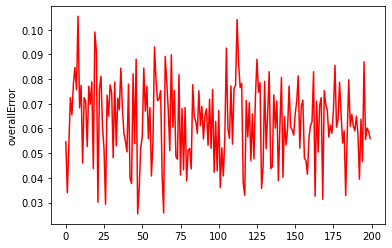

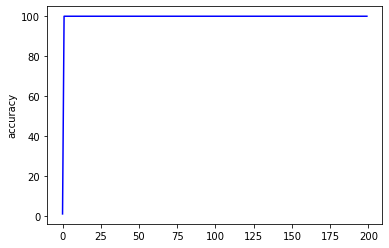

In [112]:
print(len(overallError_history))
x_range = range(max_iter//100)

print(x_range)

plt.plot(x_range,overallError_history,'r-')
plt.ylabel('overallError')
plt.show()

plt.plot(x_range,accuracy_history,'b-')
plt.ylabel('accuracy')
plt.show()